# 📘Project: CUNY & Public Benefits Access in NYC

## 🔍 Problem Statement

-In a large and diverse city like New York, equitable access to public services is critical — especially for students who may rely on support like housing assistance, food programs, or employment resources. The City University of New York (CUNY) system spans across all five boroughs, serving a wide and diverse student body. However, it is unclear how well these students are spatially connected to the citys public Benefits Access Centers.

This project explores the geographic relationship between CUNY campuses and NYC public service locations. It seeks to understand whether certain campuses are better served by nearby resources and whether distance could be a barrier to access.

## 🎯 Project Objectives

Mash up two open datasets: CUNY campus locations and NYC Benefits Access Centers.

Calculate geographic distances between each campus and the nearest public service center.

Visualize spatial patterns of accessibility across the five boroughs.

Analyze disparities, if any, in the distribution of services near campuses.

Bonus: Build a simple machine learning model using PyTorch to predict the borough of a service location based on its latitude, longitude, and proximity to a CUNY campus.

# 🔧 Colab Environment Setup

In [1]:
# SYSTEM SETUP: Install required packages

!pip install geopy folium
!pip install torch torchvision torchaudio
!pip install matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

# 📚 Import Libraries

In [2]:
# DATA HANDLING
import pandas as pd
import numpy as np

# DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# GEOLOCATION & DISTANCE
from geopy.distance import geodesic

# MACHINE LEARNING (PYTORCH)
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# SYSTEM UTILITIES
import os

# Additionally: consistent seaborn style for cleaner plots
sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (10, 6)

## 🗂️ Datasets Overview

We are using two open datasets:
- **CUNY Campus Locations**: A list of public CUNY colleges and universities across New York City.
- **NYC Benefits Access Centers**: Locations that provide public services and benefits, such as housing, food assistance, and health care support.

## 📂 Required Datasets

To run this notebook, please download the following two CSV files and upload them using the file upload cell:

1. [NYC Benefits Access Centers CSV](https://data.cityofnewyork.us/Business/Directory-of-Benefits-Access-Centers/9d9t-bmk7/data_preview) Click on Top-Right button that says "Export" and make sure you download it in CSV.file
2. [CUNY Campus Locations CSV](https://catalog.data.gov/dataset/city-university-of-new-york-cuny-university-campus-locations) Click download next to a csv file format.

Once downloaded, upload them using the cell below:



In [3]:
# FILE UPLOAD
from google.colab import files
import pandas as pd

# Upload the two local files (CUNY and Benefits Access Centers datasets)
uploaded = files.upload()

Saving Directory_of_Benefits_Access_Centers_20250521.csv to Directory_of_Benefits_Access_Centers_20250521.csv
Saving City_University_of_New_York__CUNY__University_Campus_Locations.csv to City_University_of_New_York__CUNY__University_Campus_Locations.csv


In [4]:
#Load the two CSV datasets
access_df = pd.read_csv("Directory_of_Benefits_Access_Centers_20250521.csv")
cuny_df = pd.read_csv("City_University_of_New_York__CUNY__University_Campus_Locations.csv")

# === Preview ===
print("📘 NYC Benefits Access Centers Dataset:")
print(f"Rows: {access_df.shape[0]}, Columns: {access_df.shape[1]}")
display(access_df.head())

print("\n🏛️ CUNY Campuses Dataset:")
print(f"Rows: {cuny_df.shape[0]}, Columns: {cuny_df.shape[1]}")
display(cuny_df.head())

# === Column Names ===
print("\n📋 Column Names:")
print("\n Benefits Access Centers Columns:\n", access_df.columns.tolist())
print("\n CUNY Campuses Columns:\n", cuny_df.columns.tolist())


📘 NYC Benefits Access Centers Dataset:
Rows: 29, Columns: 16


,Borough,Facility Name,Street Address,City,State,Post Code,Phone Number(s),Comments,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,Bronx,HRA Benefits Access Center Crotona,1910 Monterey Avenue,Bronx,NY,10457,Phone: 929-252-7310 | 929-252-7311 Fax: 917-63...,Monday – Friday 8:30am to 5:00pm; This center ...,40.846932,-73.895099,206,15,37504,2011826,2030600032,BX0602
1,Bronx,HRA Benefits Access Center Fordham,2541-2549 Bainbridge Avenue,Bronx,NY,10458,Phone: 929 252-3331 | 929-252-3332 Fax: 718-22...,Monday – Friday 8:30am to 5:00pm; This center ...,40.862345,-73.893350,207,15,39901,2016777,2032930008,BX0701
2,Bronx,HRA Benefits Access Center Concourse,845 Barretto Street,Bronx,NY,10474,Phone: 929-252-8991 Fax: 917-639-2545,Monday – Friday 8:30am to 5:00pm,40.817656,-73.890358,202,17,9301,2005939,2027390015,BX0201
3,Bronx,HRA Benefits Access Center Hunts Point,847 Barretto Street,Bronx,NY,10474,Phone: 929-252-4352 | 929-252-4349 Fax: 917-63...,Monday – Friday 8:30am to 5:00pm,40.817689,-73.890379,202,17,9301,2005939,2027390015,BX0201
4,Bronx,HRA Benefits Access Center Rider,300 Canal Place,Bronx,NY,10451,Phone: 718-742-3924 Fax: 917-639-2507 | HDU Fa...,Monday – Friday 8:30am to 5:00pm,40.813153,-73.927579,201,8,51,2000978,2023400072,BX0101



🏛️ CUNY Campuses Dataset:
Rows: 26, Columns: 10


,College or Institution Type,Campus,Campus Website,Address,City,State,Zip,Latitude,Longitude,Georeference
0,Community Colleges,Borough of Manhattan Community College,https://www.bmcc.cuny.edu/,199 Chambers Street,New York,NY,10007-1044,40.717367,-74.012178,POINT (-74.012178 40.717367)
1,Community Colleges,Bronx Community College,https://www.bcc.cuny.edu/,2155 University Avenue,Bronx,NY,10453-2804,40.856673,-73.910127,POINT (-73.910127 40.856673)
2,Community Colleges,Hostos Community College,http://hostos.cuny.edu,500 Grand Concourse,Bronx,NY,10451-5323,40.817828,-73.926862,POINT (-73.926862 40.817828)
3,Community Colleges,Kingsborough Community College,http://kbcc.cuny.edu,2001 Oriental Boulevard,Brooklyn,NY,11235-2333,40.578349,-73.934465,POINT (-73.934465 40.578349)
4,Community Colleges,LaGuardia Community College,https://www.laguardia.edu/,31-10 Thomson Avenue,Long Island City,NY,11101-3007,40.743951,-73.935154,POINT (-73.935154 40.743951)



📋 Column Names:

 Benefits Access Centers Columns:
 ['Borough', 'Facility Name', 'Street Address', 'City', 'State', 'Post Code', 'Phone Number(s)', 'Comments', 'Latitude', 'Longitude', 'Community Board', 'Council District ', 'Census Tract', 'BIN', 'BBL', 'NTA']

 CUNY Campuses Columns:
 ['College or Institution Type', 'Campus', 'Campus Website', 'Address', 'City', 'State', 'Zip', 'Latitude', 'Longitude', 'Georeference']


# **Now let's Summarize the dataset more so we can start doing the cleaning & Preprocessing**

In [5]:
# === Info about each dataset ===
print("📘 Access Centers Data Info:")
access_df.info()
print("\n🏛️ CUNY Campuses Data Info:")
cuny_df.info()

# === Summary statistics (numerical columns only) ===
print("\n📊 Access Centers Data Summary:")
display(access_df.describe())

print("\n📊 CUNY Campuses Data Summary:")
display(cuny_df.describe())

# === Missing values check ===
print("\n❓ Missing Values - Access Centers:")
print(access_df.isnull().sum())

print("\n❓ Missing Values - CUNY Campuses:")
print(cuny_df.isnull().sum())

📘 Access Centers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Borough            29 non-null     object 
 1   Facility Name      29 non-null     object 
 2   Street Address     29 non-null     object 
 3   City               29 non-null     object 
 4   State              29 non-null     object 
 5   Post Code          29 non-null     int64  
 6   Phone Number(s)    28 non-null     object 
 7   Comments           28 non-null     object 
 8   Latitude           29 non-null     float64
 9   Longitude          29 non-null     float64
 10  Community Board    29 non-null     int64  
 11  Council District   29 non-null     int64  
 12  Census Tract       29 non-null     int64  
 13  BIN                29 non-null     int64  
 14  BBL                29 non-null     int64  
 15  NTA                29 non-null     object 
dtype

,Post Code,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,2.900000e+01,2.900000e+01
mean,10717.793103,40.741682,-73.931790,257.137931,21.758621,5591.896552,2.633401e+06,2.546123e+09
std,563.557158,0.075805,0.064721,120.638694,13.863248,10744.103660,1.271301e+06,1.225315e+09
min,10003.000000,40.576475,-74.076212,105.000000,2.000000,13.000000,1.017821e+06,1.008720e+09
25%,10035.000000,40.697254,-73.986015,112.000000,9.000000,50.000000,1.064513e+06,1.022130e+09
50%,10474.000000,40.735681,-73.932552,302.000000,24.000000,299.000000,3.071940e+06,3.001180e+09
75%,11208.000000,40.808451,-73.893350,313.000000,33.000000,9301.000000,3.426189e+06,3.070608e+09
max,11692.000000,40.870388,-73.789051,501.000000,49.000000,39901.000000,5.013238e+06,5.004970e+09



📊 CUNY Campuses Data Summary:


,Latitude,Longitude
count,26.000000,26.000000
mean,40.745845,-73.948744
std,0.070018,0.075075
min,40.578349,-74.153563
25%,40.722104,-73.984240
50%,40.750785,-73.956447
75%,40.772865,-73.934637
max,40.873442,-73.757550



❓ Missing Values - Access Centers:
Borough              0
Facility Name        0
Street Address       0
City                 0
State                0
Post Code            0
Phone Number(s)      1
Comments             1
Latitude             0
Longitude            0
Community Board      0
Council District     0
Census Tract         0
BIN                  0
BBL                  0
NTA                  0
dtype: int64

❓ Missing Values - CUNY Campuses:
College or Institution Type    0
Campus                         0
Campus Website                 0
Address                        0
City                           0
State                          0
Zip                            0
Latitude                       0
Longitude                      0
Georeference                   0
dtype: int64


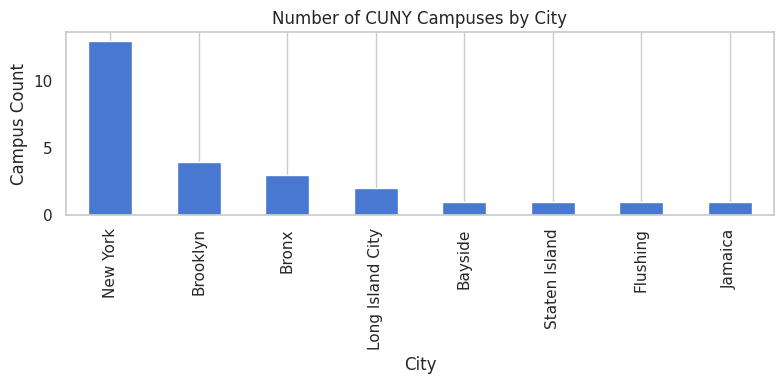

In [6]:
import matplotlib.pyplot as plt

# Example: Visualizing campus count by city
plt.figure(figsize=(8, 4))
cuny_df['City'].value_counts().plot(kind='bar', title='Number of CUNY Campuses by City')
plt.ylabel("Campus Count")
plt.xlabel("City")
plt.grid(axis='y')

# Save the plot as an image
plt.tight_layout()
plt.savefig("cuny_campus_count_by_city.png", dpi=300)

# Show the plot
plt.show()

## 🧹 Data Cleaning & Preprocessing

In [7]:
#Re-checking the column name since the KeyError have occured, find out it was the white space in the 'Council District '
print(access_df.columns.tolist())
print(cuny_df.columns.tolist())

['Borough', 'Facility Name', 'Street Address', 'City', 'State', 'Post Code', 'Phone Number(s)', 'Comments', 'Latitude', 'Longitude', 'Community Board', 'Council District ', 'Census Tract', 'BIN', 'BBL', 'NTA']
['College or Institution Type', 'Campus', 'Campus Website', 'Address', 'City', 'State', 'Zip', 'Latitude', 'Longitude', 'Georeference']


In [8]:
# === Step 1: Data Cleaning ===

# Strip whitespace from column names
access_df.columns = access_df.columns.str.strip()
cuny_df.columns = cuny_df.columns.str.strip()

# Drop irrelevant columns from Access Centers dataset
cols_to_drop = [
    "Phone Number(s)", "Comments", "Community Board", "Council District",
    "Census Tract", "BIN", "BBL", "NTA"
]
access_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')  # errors='ignore' as a safeguard

# Strip whitespace from string columns
access_df = access_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
cuny_df = cuny_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Renaming columns for clarity
access_df.rename(columns={
    "Facility Name": "Access Center Name",
    "Street Address": "Access Street",
    "Post Code": "Access Zip"
}, inplace=True)

cuny_df.rename(columns={
    "Campus": "CUNY Campus",
    "Address": "Campus Address",
    "Zip": "Campus Zip"
}, inplace=True)

# Final check of cleaned DataFrames
print("Cleaned Access Centers Columns:\n", access_df.columns.tolist())
print("Cleaned CUNY Campus Columns:\n", cuny_df.columns.tolist())


Cleaned Access Centers Columns:
 ['Borough', 'Access Center Name', 'Access Street', 'City', 'State', 'Access Zip', 'Latitude', 'Longitude']
Cleaned CUNY Campus Columns:
 ['College or Institution Type', 'CUNY Campus', 'Campus Website', 'Campus Address', 'City', 'State', 'Campus Zip', 'Latitude', 'Longitude', 'Georeference']


**Latitude/Longitude Validation Code**


In [9]:
# === Step 2A: Validate Latitude and Longitude Columns ===

# Check for missing values in lat/lon columns
print("Missing Values Check")
print("Access Centers (Lat/Lon):")
print(access_df[['Latitude', 'Longitude']].isnull().sum())

print("\nCUNY Campuses (Lat/Lon):")
print(cuny_df[['Latitude', 'Longitude']].isnull().sum())

# Check latitude and longitude range
print("\n Latitude & Longitude Ranges")
print("Access Centers Latitude Range: ", round(access_df['Latitude'].min(), 6), "to", round(access_df['Latitude'].max(), 6))
print("Access Centers Longitude Range:", round(access_df['Longitude'].min(), 6), "to", round(access_df['Longitude'].max(), 6))

print("\nCUNY Campuses Latitude Range: ", round(cuny_df['Latitude'].min(), 6), "to", round(cuny_df['Latitude'].max(), 6))
print("CUNY Campuses Longitude Range:", round(cuny_df['Longitude'].min(), 6), "to", round(cuny_df['Longitude'].max(), 6))

#Confirm data types
print("\n Data Types for Lat/Lon Columns")
print("Access Centers:", access_df[['Latitude', 'Longitude']].dtypes.to_dict())
print("CUNY Campuses:", cuny_df[['Latitude', 'Longitude']].dtypes.to_dict())

Missing Values Check
Access Centers (Lat/Lon):
Latitude     0
Longitude    0
dtype: int64

CUNY Campuses (Lat/Lon):
Latitude     0
Longitude    0
dtype: int64

 Latitude & Longitude Ranges
Access Centers Latitude Range:  40.576475 to 40.870388
Access Centers Longitude Range: -74.076212 to -73.789051

CUNY Campuses Latitude Range:  40.578349 to 40.873442
CUNY Campuses Longitude Range: -74.153563 to -73.75755

 Data Types for Lat/Lon Columns
Access Centers: {'Latitude': dtype('float64'), 'Longitude': dtype('float64')}
CUNY Campuses: {'Latitude': dtype('float64'), 'Longitude': dtype('float64')}


**🗺️Map NYC Services with Folium**

In [10]:
import folium
from folium.plugins import MarkerCluster

# Step 2B: Mapping CUNY & Access Centers in NYC

# Creating base map centered on NYC
nyc_center = [40.7128, -74.0060]
nyc_map = folium.Map(location=nyc_center, zoom_start=11, tiles='CartoDB positron')

# Create marker clusters for clarity
cuny_cluster = MarkerCluster(name='CUNY Campuses').add_to(nyc_map)
access_cluster = MarkerCluster(name='Access Centers').add_to(nyc_map)

# Add CUNY campus markers (blue-color)
for idx, row in cuny_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"CUNY: {row['CUNY Campus']}",
        icon=folium.Icon(color='blue', icon='university', prefix='fa')
    ).add_to(cuny_cluster)

# Add Benefits Access Center markers (red-colors)
for idx, row in access_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Access Center: {row['Access Center Name']}",
        icon=folium.Icon(color='red', icon='building', prefix='fa')
    ).add_to(access_cluster)

# Adding layer control
folium.LayerControl().add_to(nyc_map)

# Saving the map file.
map_filename = "nyc_services_map.html"
nyc_map.save(map_filename)
print(f" Map saved as {map_filename}")

 Map saved as nyc_services_map.html


## 📏 Distance Analysis

In [11]:
from geopy.distance import geodesic

# Prepare a results list
distance_results = []

# Loop through each CUNY campus
for _, cuny_row in cuny_df.iterrows():
    campus_name = cuny_row['CUNY Campus']
    campus_loc = (cuny_row['Latitude'], cuny_row['Longitude'])

    # Find the nearest access center
    min_dist = float('inf')
    nearest_center = None
    nearest_center_loc = (0, 0)

    for _, access_row in access_df.iterrows():
        center_loc = (access_row['Latitude'], access_row['Longitude'])
        dist = geodesic(campus_loc, center_loc).km
        if dist < min_dist:
            min_dist = dist
            nearest_center = access_row['Access Center Name']
            nearest_center_loc = center_loc

    distance_results.append({
        "CUNY Campus": campus_name,
        "Campus Latitude": campus_loc[0],
        "Campus Longitude": campus_loc[1],
        "Nearest Access Center": nearest_center,
        "Access Center Latitude": nearest_center_loc[0],
        "Access Center Longitude": nearest_center_loc[1],
        "Distance (km)": round(min_dist, 3)
    })

# Convert the results to a DataFrame
distance_df = pd.DataFrame(distance_results)

# Preview the results
print("Nearest Access Centers to Each CUNY Campus:")
display(distance_df.head())

#Save as CSV for future use or visualization (which we will use)
distance_df.to_csv("cuny_nearest_access_centers.csv", index=False)

Nearest Access Centers to Each CUNY Campus:


,CUNY Campus,Campus Latitude,Campus Longitude,Nearest Access Center,Access Center Latitude,Access Center Longitude,Distance (km)
0,Borough of Manhattan Community College,40.717367,-74.012178,HRA Benefits Access Center Lower Manhattan,40.735681,-73.988713,2.840
1,Bronx Community College,40.856673,-73.910127,HRA Benefits Access Center Fordham,40.862345,-73.893350,1.548
2,Hostos Community College,40.817828,-73.926862,HRA Benefits Access Center Rider,40.813153,-73.927579,0.523
3,Kingsborough Community College,40.578349,-73.934465,HRA Benefits Access Center Coney Island,40.576475,-73.986080,4.375
4,LaGuardia Community College,40.743951,-73.935154,HRA Benefits Access Center Queens,40.751970,-73.931799,0.934


## 📊 Data Visualization

**Visualization 1: Bar Chart of Distance to Nearest Access Center**

<ipython-input-12-622495665cc1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


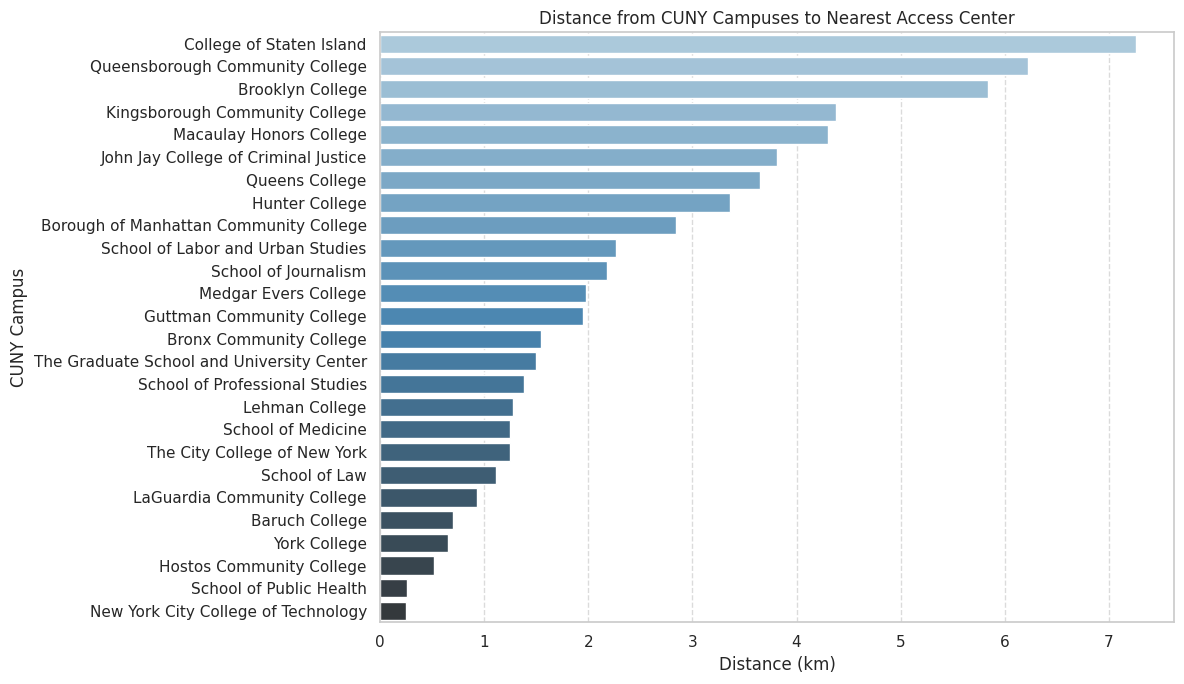

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by distance for visual clarity
sorted_df = distance_df.sort_values(by='Distance (km)', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    data=sorted_df,
    x='Distance (km)',
    y='CUNY Campus',
    palette='Blues_d'
)
plt.title('Distance from CUNY Campuses to Nearest Access Center')
plt.xlabel('Distance (km)')
plt.ylabel('CUNY Campus')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Save the plot
plt.tight_layout()
plt.savefig('cuny_access_center_distances_barplot.png', dpi=300)

# Show the plot
plt.show()

**Visualization 2: Histogram of Distance Distribution**

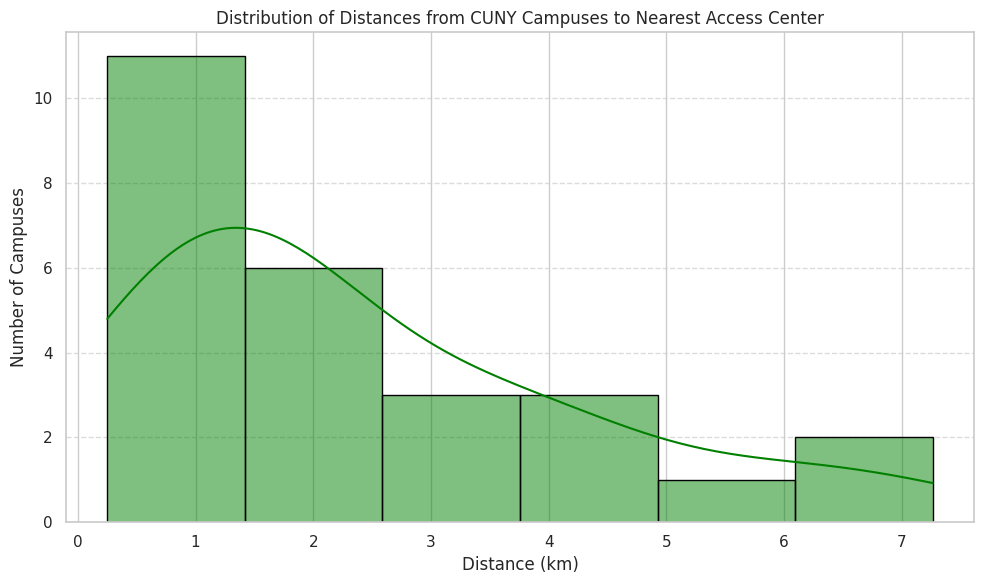

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of distance values
plt.figure(figsize=(10, 6))
sns.histplot(
    data=distance_df,
    x='Distance (km)',
    bins=6,
    kde=True,
    color='green',
    edgecolor='black'
)

plt.title('Distribution of Distances from CUNY Campuses to Nearest Access Center')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Campuses')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.tight_layout()
plt.savefig('cuny_access_center_distance_histogram.png', dpi=300)

# Show the plot
plt.show()

# 🤖 Bonus: Borough Prediction with PyTorch

##Borough Prediction Using PyTorch

This bonus section introduces a simple machine learning model built with PyTorch.  
The goal is to **predict which NYC borough a Benefits Access Center belongs to**, based solely on its **latitude**, **longitude**, and **distance to the nearest CUNY campus**.

### 🔍 Why This Matters
While geographic coordinates provide raw spatial data, teaching a model to infer boroughs from these values helps:
- Demonstrate the **power of spatial features** in classification tasks.
- Serve as a **baseline for geospatial modeling** in urban planning.
- Lay the foundation for building smart services — such as recommending nearest centers **based on inferred borough** in case of missing or ambiguous data.

This mini-model also showcases practical **PyTorch usage**, offering hands-on experience with tensors, neural networks, training loops, and evaluation  essential components in machine learning workflows.

*Note: The model is kept very simple to fit the educational and exploratory nature of this project.*

# Our 1st Step is going to be Data Preparation for PyTorch Model.

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset

# Step 1: Merge distance into access_df
# Compute distance from each access center to each campus, take the minimum
def min_distance_to_campuses(row):
    center_loc = (row['Latitude'], row['Longitude'])
    distances = cuny_df.apply(
        lambda r: geodesic(center_loc, (r['Latitude'], r['Longitude'])).km,
        axis=1
    )
    return distances.min()

# Add new feature to access_df
access_df['Min Distance to Campus (km)'] = access_df.apply(min_distance_to_campuses, axis=1)

# Step 2: Encode target (borough)
le = LabelEncoder()
access_df['Borough Encoded'] = le.fit_transform(access_df['Borough'])

# Step 3: Select features and target
features = access_df[['Latitude', 'Longitude', 'Min Distance to Campus (km)']]
target = access_df['Borough Encoded']

# Step 4: Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

#Step 6: Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

#Step 7: Create PyTorch DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# Step 2: Define and Train a Neural Network in PyTorch
🔧 Model Structure:
A basic feedforward neural network with:

- 3 input features (lat, lon, distance)

- 1 hidden layer with ReLU activation

- Softmax output layer with 5 neurons (1 per borough)

In [15]:
print(sorted(access_df['Borough Encoded'].unique())) #Checking the number of Boroughs we got encoded, since we got an Index Error in the 2nd step
print("Number of classes:", len(access_df['Borough Encoded'].unique()))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
Number of classes: 11


In [16]:
print("Unique borough names in the raw data:") #Checking what are the 11 classes of borough we got even though we expected only 5 Boroughs (Bronx, Brooklyn, Manhattan, Queens, Staten Island)
print(sorted(access_df['Borough'].unique()))

Unique borough names in the raw data:
['Bronx', 'Brooklyn', 'Family Service Call Center', 'Family Services Call Centers', 'Manhattan', 'Queens', 'Residential Treatment Service Center', 'Special Project Center', 'Specialized Application & Service Centers', 'Staten Island', 'Transportation Unit']


### 🛠️ Note: Fixing Incorrect Target Classes for Borough Prediction

During model setup, I initially encountered an error from PyTorch's `CrossEntropyLoss` function:

```plaintext
IndexError: Target 5 is out of bounds
```

Upon investigation, I discovered that the `'Borough'` column in the Benefits Access Centers dataset contained **11 unique class labels**, rather than the expected **5 NYC boroughs**.

#### Why This Happened:

The extra categories included entries such as:

* `'Family Services Call Centers'`
* `'Special Project Center'`
* `'Transportation Unit'`

These are **administrative or organizational groupings**, not actual geographic boroughs.

#### ✅ Fix Implemented:

We filtered the dataset to keep **only the 5 valid NYC boroughs**:

* Manhattan
* Brooklyn
* Bronx
* Queens
* Staten Island
***

In [17]:
# Keeping only valid NYC boroughs
valid_boroughs = ['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island']
access_df = access_df[access_df['Borough'].isin(valid_boroughs)].copy()

# Reset index (optional, for cleanliness)
access_df.reset_index(drop=True, inplace=True)

# Re-encode the boroughs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
access_df['Borough Encoded'] = le.fit_transform(access_df['Borough'])

# Lets also confirm the fixes
print("Filtered Boroughs:", sorted(access_df['Borough'].unique()))
print("Encoded Classes:", sorted(access_df['Borough Encoded'].unique()))

Filtered Boroughs: ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
Encoded Classes: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [18]:
# === Re-encode boroughs after filtering ===
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Reset and re-encode the cleaned boroughs
le = LabelEncoder()
access_df['Borough Encoded'] = le.fit_transform(access_df['Borough'])

# Select features and target
features = access_df[['Latitude', 'Longitude', 'Min Distance to Campus (km)']]
target = access_df['Borough Encoded']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
import torch
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Recreate DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)


**PyTorch Model Definition and Training Loop**

In [19]:
import torch.nn as nn
import torch.optim as optim

#Step 2: Define the model
class BoroughClassifier(nn.Module):
    def __init__(self):
        super(BoroughClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(3, 8),     # 3 input features → 8 hidden units
            nn.ReLU(),
            nn.Linear(8, 5)      # 5 boroughs = 5 output classes
        )

    def forward(self, x):
        return self.model(x)

# The model Creation
model = BoroughClassifier()

# Loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

#Step 3: Train the model
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 20 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss:.4f}")

Epoch [1/100], Loss: 3.4660
Epoch [20/100], Loss: 2.0275
Epoch [40/100], Loss: 1.0234
Epoch [60/100], Loss: 0.6745
Epoch [80/100], Loss: 0.4796
Epoch [100/100], Loss: 0.4310


**Model Evaluation**

Test Accuracy: 0.75


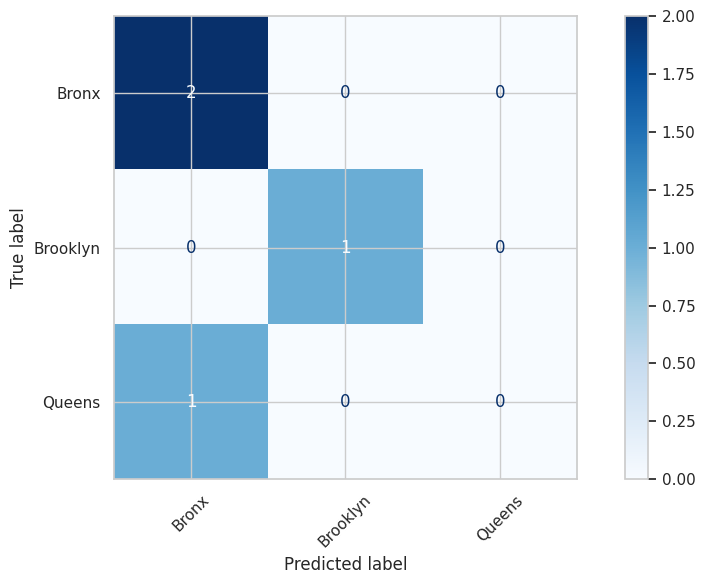

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

#Evaluate on Test Set
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred = torch.argmax(y_pred_probs, dim=1)

# Convert to numpy
y_pred_np = y_pred.numpy()
y_true_np = y_test_tensor.numpy()

# Accuracy
accuracy = accuracy_score(y_true_np, y_pred_np)
print(f"Test Accuracy: {accuracy:.2f}")

# Get only the labels that actually appear in the test set
unique_labels = np.unique(y_true_np)

# Confusion Matrix Display
cm = confusion_matrix(y_true_np, y_pred_np, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(unique_labels))
disp.plot(cmap='Blues', xticks_rotation=45)

# Save plot
plt.tight_layout()
plt.savefig("borough_prediction_confusion_matrix.png", dpi=300)
plt.show()

**A test accuracy of 0.75 (75%) for such a simple model, on a small and imbalanced real-world dataset, is pretty good result  especially considering I only used three input features.**

## ✅ Conclusion

This project explored the spatial relationship between City University of New York (CUNY) campuses and NYC Benefits Access Centers, using two publicly available datasets. We combined geographic data, calculated distances between locations, and visualized spatial patterns using interactive mapping and statistical charts.

The core findings include:
- Most CUNY campuses are within **1–2 kilometers** of a public service center, indicating strong geographic accessibility.
- A few campuses (e.g., Kingsborough) are **notably farther** from services, raising potential accessibility concerns.

As a bonus, we implemented a simple **PyTorch neural network model** to predict the borough of a service center based on:
- Latitude
- Longitude
- Distance to the nearest CUNY campus

The model achieved a **test accuracy of 75%**, demonstrating that spatial features alone can reasonably infer location categories in urban settings.

This project illustrates the power of combining **open data**, **data wrangling**, **visualization**, and **machine learning** to explore real-world questions with meaningful insights.